# Simulating optic nerve signals with a default trichromatic retina

This is the ipython notebook that supplements the [Retina Simulation tutorial](https://matisse.eecs.berkeley.edu/tutorials/2_RetinaSimulation.html).

Before running these codes, please make sure you have installed the required packages and set up the environment as described in the [Getting Started](https://matisse.eecs.berkeley.edu/tutorials/1_GettingStarted.html).

Also, make sure you have selected the correct python kernel (e.g. `MatisseEnv`).

---

## Setup

In [1]:
from helper import *
DEVICE = 'cuda:0' if torch.cuda.is_available() else 'cpu'

## Main Code for Retina Simulation

In [2]:
from Simulated.Retina.RetinaModel import RetinaModel

# Load RetinaModel from the config yaml file
with open(f'{ROOT_DIR}/Tutorials/RetinaSimulation/Config/Default_Retina_Simulation.yaml', 'r') as f:
    params = yaml.safe_load(f)

retina = RetinaModel(params, DEVICE)

In [3]:
# You can change the example_image_path to the path of your own image
example_image_path = f'{ROOT_DIR}/Tutorials/data/sample_sRGB_image.png'
example_sRGB_image = load_sRGB_image(retina, example_image_path, params)

example_linsRGB_image = retina.CST.sRGB_to_linsRGB(example_sRGB_image)
example_LMS_image = retina.CST.linsRGB_to_LMS(example_linsRGB_image)
example_LMS_image = example_LMS_image.unsqueeze(0).permute(0, 3, 1, 2)

with torch.no_grad(): # gradient computation is not needed for retina simulation
    list_of_retinal_responses = retina.forward(example_LMS_image, intermediate_outputs=True)
    optic_nerve_signals = list_of_retinal_responses[0]
    spatially_sampled_LMS = list_of_retinal_responses[2]
    photoreceptor_activation = list_of_retinal_responses[3]
    bipolar_signals = list_of_retinal_responses[4]
    LMS_current_FoV = list_of_retinal_responses[5]

linsRGB_current_FoV = retina.CST.LMS_to_linsRGB(LMS_current_FoV.permute(0,1,3,4,2))
sRGB_current_FoV = retina.CST.linsRGB_to_sRGB(linsRGB_current_FoV).permute(0,1,4,2,3)

In [4]:
# Visualize the simulated retinal responses

# Rendered results are saved in Results folder (both .gif and .mp4 files)
os.makedirs(f'{ROOT_DIR}/Tutorials/RetinaSimulation/Results', exist_ok=True)
render_retinal_signals(optic_nerve_signals, 'Optic Nerve Signals', 'ons')
render_retinal_signals(bipolar_signals, 'Bipolar Signals', 'bipolar')
render_retinal_signals(photoreceptor_activation, 'Photoreceptor Activation', 'pa')
render_retinal_signals(spatially_sampled_LMS, 'Spatially Sampled LMS', 'warped_LMS')
render_retinal_signals(sRGB_current_FoV, 'Current FoV (sRGB)', 'sRGB_current_FoV')
render_retinal_signals(LMS_current_FoV, 'Current FoV (LMS)', 'LMS_current_FoV')

Rendering Optic Nerve Signals...
Rendering Bipolar Signals...
Rendering Photoreceptor Activation...
Rendering Spatially Sampled LMS...
Rendering Current FoV (sRGB)...
Rendering Current FoV (LMS)...


In [5]:
from IPython.display import display, Image
from IPython.display import HTML

# Show 6 gif files in 3x2 grid with uniform size
html_content = """
<table>
    <tr>
        <td><p align="center">Current FoV (sRGB)</p><img src='{ROOT_DIR}/Tutorials/RetinaSimulation/Results/sRGB_current_FoV.gif' width='200' height='200'></td>
        <td><p align="center">Current FoV (LMS)</p><img src='{ROOT_DIR}/Tutorials/RetinaSimulation/Results/LMS_current_FoV.gif' width='200' height='200'></td>
        <td><p align="center">Spatially Sampled LMS</p><img src='{ROOT_DIR}/Tutorials/RetinaSimulation/Results/warped_LMS.gif' width='200' height='200'></td>
    </tr>
    <tr>
        <td><p align="center">Photoreceptor Activation</p><img src='{ROOT_DIR}/Tutorials/RetinaSimulation/Results/pa.gif' width='200' height='200'></td>
        <td><p align="center">Bipolar Signals</p><img src='{ROOT_DIR}/Tutorials/RetinaSimulation/Results/bipolar.gif' width='200' height='200'></td>
        <td><p align="center">Optic Nerve Signals</p><img src='{ROOT_DIR}/Tutorials/RetinaSimulation/Results/ons.gif' width='200' height='200'></td>
    </tr>
</table>
""".format(ROOT_DIR=ROOT_DIR)

display(HTML(html_content))

Current FoV (sRGB),Current FoV (LMS),Spatially Sampled LMS
Photoreceptor Activation,Bipolar Signals,Optic Nerve Signals


## Instantiate different retina models

In [6]:
# Default RetinaModel
with open(f'{ROOT_DIR}/Tutorials/RetinaSimulation/Config/Default_Retina_Simulation.yaml', 'r') as f:
    default_params = yaml.safe_load(f)
default_retina = RetinaModel(default_params).to(DEVICE)

# LM_Tritanopia RetinaModel
with open(f'{ROOT_DIR}/Tutorials/RetinaSimulation/Config/LM_Tritanopia.yaml', 'r') as f:
    lm_tritanopia_params = yaml.safe_load(f)
lm_tritanopia_retina = RetinaModel(lm_tritanopia_params).to(DEVICE)

# LS_Deuteranopia RetinaModel
with open(f'{ROOT_DIR}/Tutorials/RetinaSimulation/Config/LS_Deuteranopia.yaml', 'r') as f:
    ls_deuteranopia_params = yaml.safe_load(f)
ls_deuteranopia_retina = RetinaModel(ls_deuteranopia_params).to(DEVICE)

# MS_Protanopia RetinaModel
with open(f'{ROOT_DIR}/Tutorials/RetinaSimulation/Config/MS_Protanopia.yaml', 'r') as f:
    ms_protanopia_params = yaml.safe_load(f)
ms_protanopia_retina = RetinaModel(ms_protanopia_params).to(DEVICE)

In [7]:
# You can change the example_image_path to the path of your own image
example_image_path = f'{ROOT_DIR}/Tutorials/data/sample_sRGB_image.png'
example_sRGB_image = load_sRGB_image(default_retina, example_image_path, default_params)
example_linsRGB_image = default_retina.CST.sRGB_to_linsRGB(example_sRGB_image)
example_LMS_image = default_retina.CST.linsRGB_to_LMS(example_linsRGB_image)
example_LMS_image = example_LMS_image.unsqueeze(0).permute(0, 3, 1, 2)

# Setting the same seed for all the retina simulations to make the random eye motion path the same

# Run the retina simulation with default retina model
torch.manual_seed(0)
with torch.no_grad(): # gradient computation is not needed for retina simulation
    list_of_retinal_responses = default_retina.forward(example_LMS_image, intermediate_outputs=True)
    default_optic_nerve_signals = list_of_retinal_responses[0]
    default_photoreceptor_activation = list_of_retinal_responses[3]

# Run the retina simulation with LM_Tritanopia retina model
torch.manual_seed(0)
with torch.no_grad():
    list_of_retinal_responses = lm_tritanopia_retina.forward(example_LMS_image, intermediate_outputs=True)
    lm_tritanopia_optic_nerve_signals = list_of_retinal_responses[0]
    lm_tritanopia_photoreceptor_activation = list_of_retinal_responses[3]

# Run the retina simulation with LS_Deuteranopia retina model
torch.manual_seed(0)
with torch.no_grad():
    list_of_retinal_responses = ls_deuteranopia_retina.forward(example_LMS_image, intermediate_outputs=True)
    ls_deuteranopia_optic_nerve_signals = list_of_retinal_responses[0]
    ls_deuteranopia_photoreceptor_activation = list_of_retinal_responses[3]

# Run the retina simulation with MS_Protanopia retina model
torch.manual_seed(0)
with torch.no_grad():
    list_of_retinal_responses = ms_protanopia_retina.forward(example_LMS_image, intermediate_outputs=True)
    ms_protanopia_optic_nerve_signals = list_of_retinal_responses[0]
    ms_protanopia_photoreceptor_activation = list_of_retinal_responses[3]

# Converting torch tensor to numpy array
t = 100 # time step to visualize
lms_default_pa = default_photoreceptor_activation[0, t].cpu().detach().numpy()
lm_tritanopia_pa = lm_tritanopia_photoreceptor_activation[0, t].cpu().detach().numpy()
ls_deuteranopia_pa = ls_deuteranopia_photoreceptor_activation[0, t].cpu().detach().numpy()
ms_protanopia_pa = ms_protanopia_photoreceptor_activation[0, t].cpu().detach().numpy()

lms_default_ons = default_optic_nerve_signals[0, t].cpu().detach().numpy()
lm_tritanopia_ons = lm_tritanopia_optic_nerve_signals[0, t].cpu().detach().numpy()
ls_deuteranopia_ons = ls_deuteranopia_optic_nerve_signals[0, t].cpu().detach().numpy()
ms_protanopia_ons = ms_protanopia_optic_nerve_signals[0, t].cpu().detach().numpy()

In [8]:
# Getting the cone mosaic used in the retina simulation
lms_cone_mosaic = default_retina.SpectralSampling.get_cone_mosaic()
lm_tritanopia_LMS_cone_mosaic = lm_tritanopia_retina.SpectralSampling.get_cone_mosaic()
ls_deuteranopia_LMS_cone_mosaic = ls_deuteranopia_retina.SpectralSampling.get_cone_mosaic()
ms_protanopia_LMS_cone_mosaic = ms_protanopia_retina.SpectralSampling.get_cone_mosaic()

# Converting the cone mosaic to numpy array
lms_cone_mosaic = lms_cone_mosaic[0].permute(1,2,0).cpu().detach().numpy()[:,:,:3]
lm_tritanopia_LMS_cone_mosaic = lm_tritanopia_LMS_cone_mosaic[0].permute(1,2,0).cpu().detach().numpy()[:,:,:3]
ls_deuteranopia_LMS_cone_mosaic = ls_deuteranopia_LMS_cone_mosaic[0].permute(1,2,0).cpu().detach().numpy()[:,:,:3]
ms_protanopia_LMS_cone_mosaic = ms_protanopia_LMS_cone_mosaic[0].permute(1,2,0).cpu().detach().numpy()[:,:,:3]

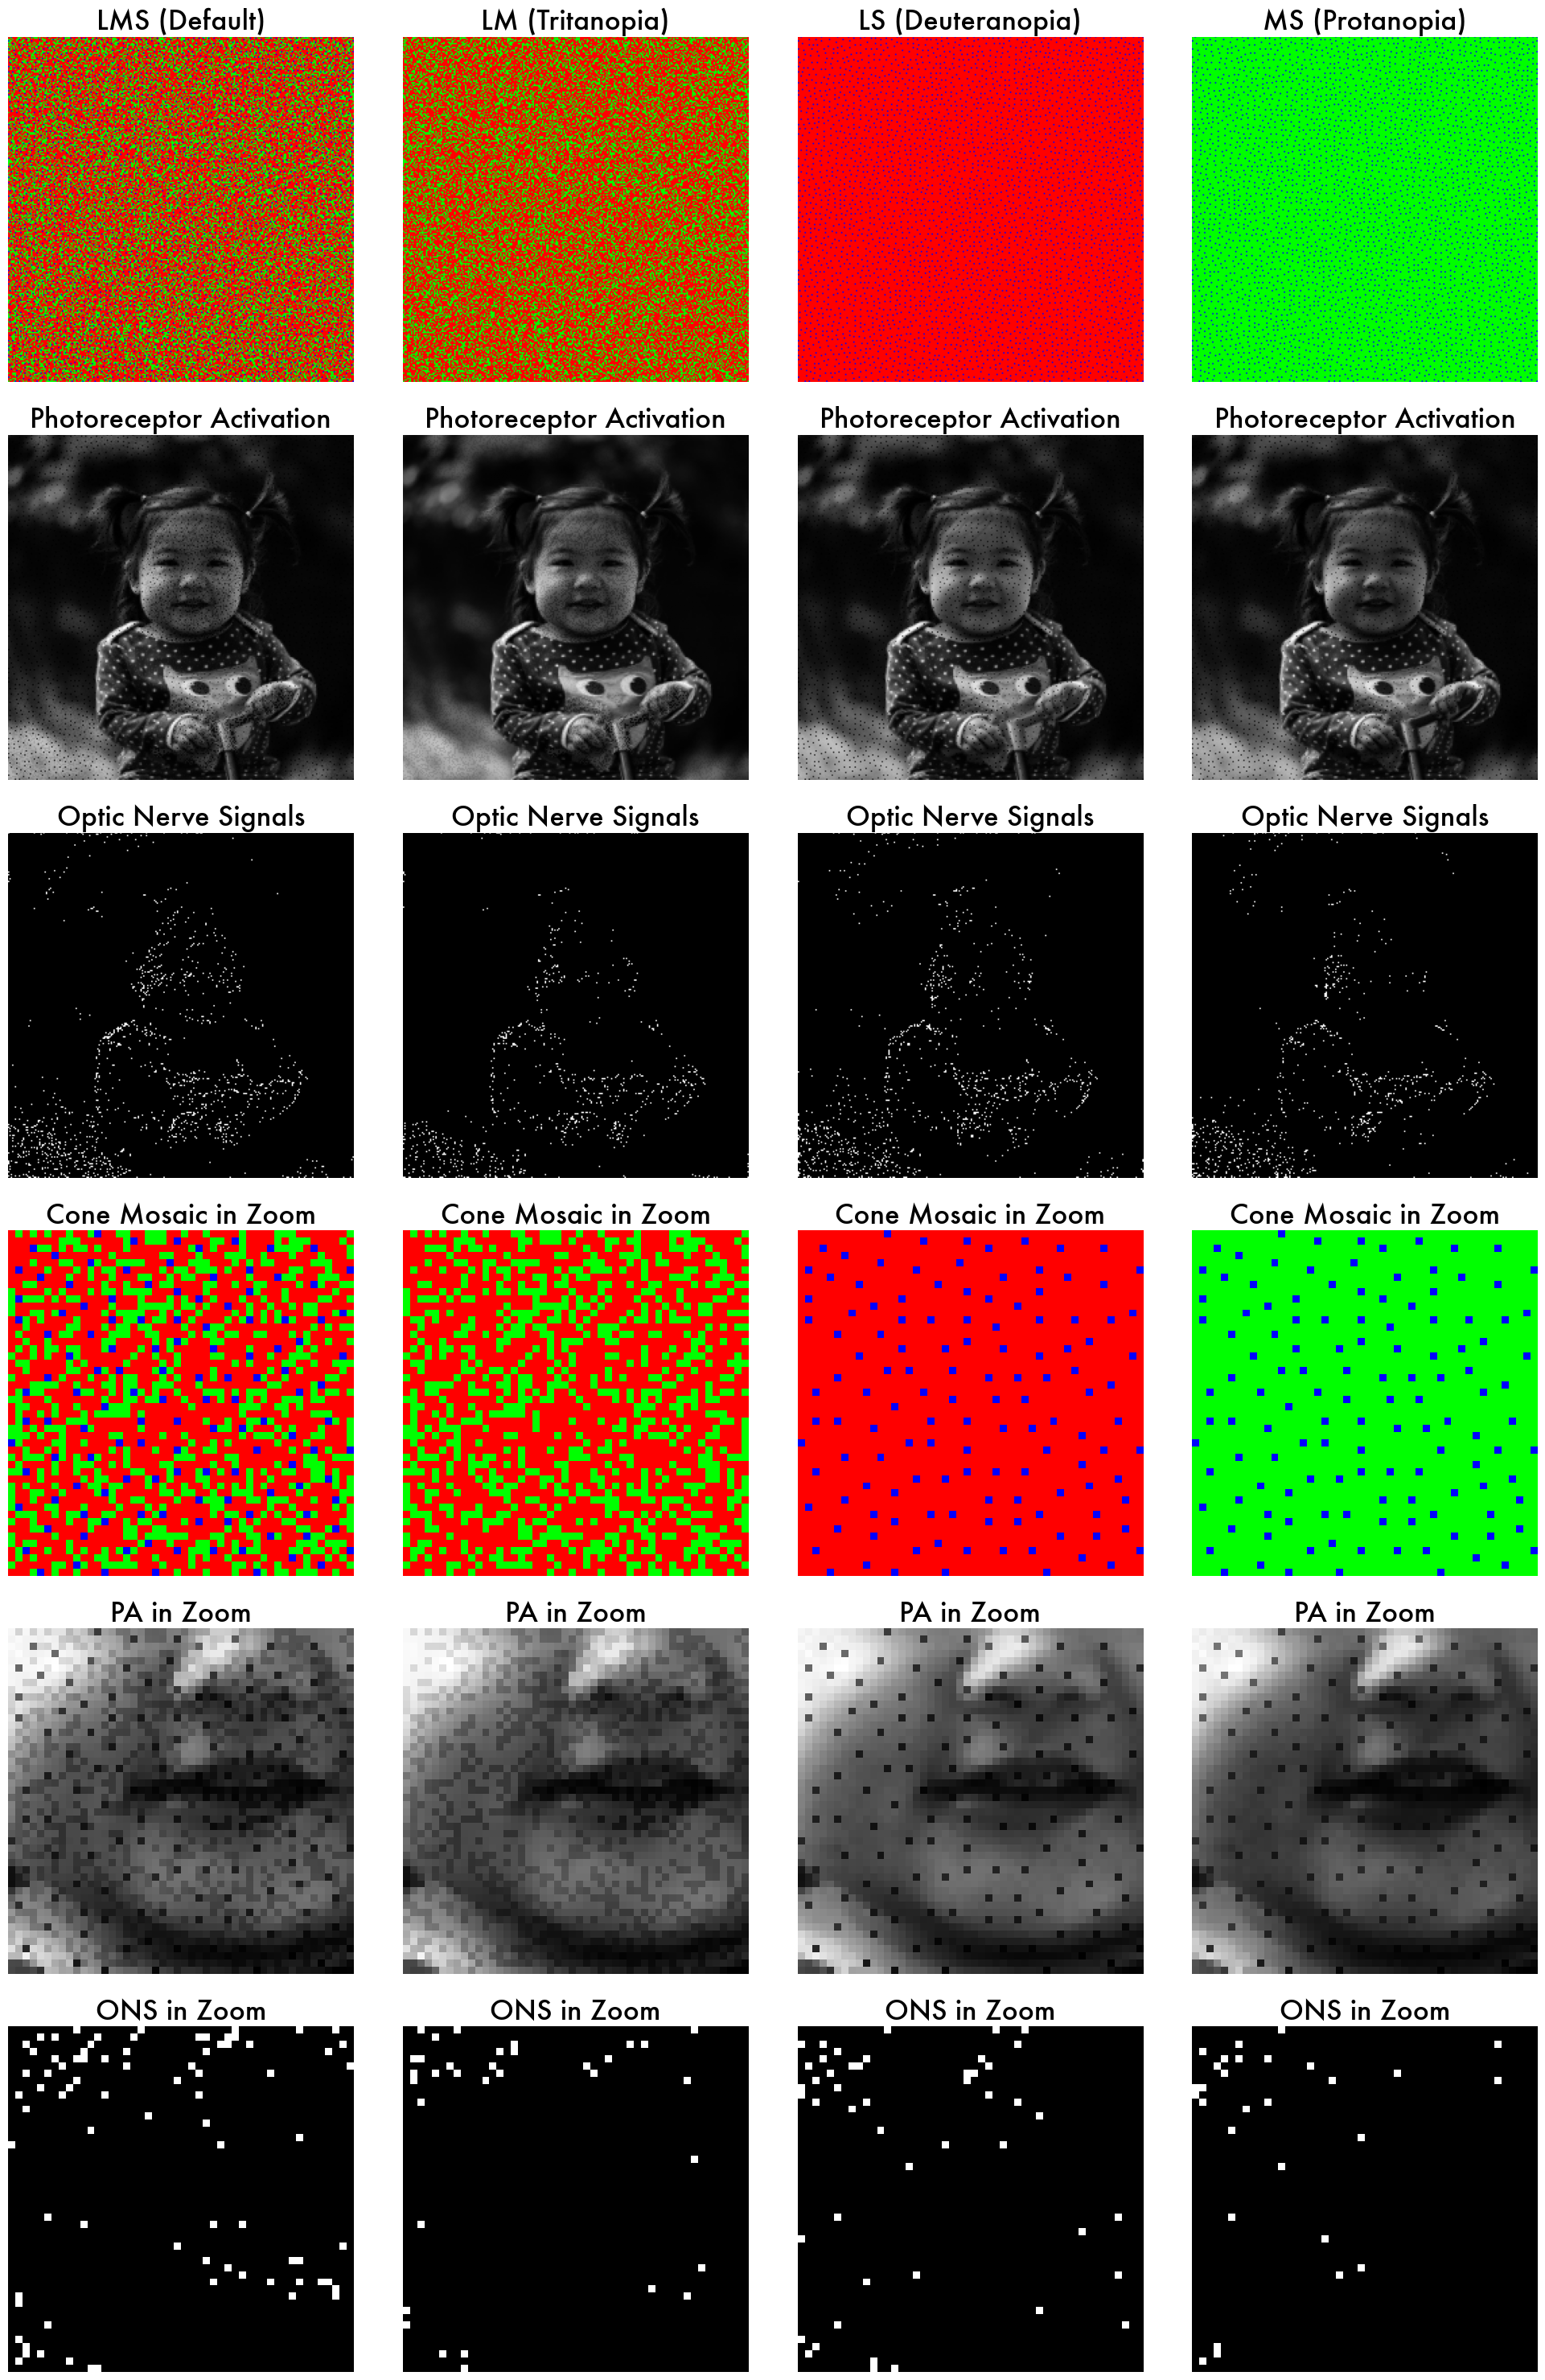

In [16]:
# show a figure with 4 subplots
fig, axs = plt.subplots(6, 4, figsize=(20, 30))

axs[0, 0].imshow(lms_cone_mosaic)
axs[0, 0].set_title('LMS (Default)')
axs[0, 0].set_axis_off()
axs[0, 1].imshow(lm_tritanopia_LMS_cone_mosaic)
axs[0, 1].set_title('LM (Tritanopia)')
axs[0, 1].set_axis_off()
axs[0, 2].imshow(ls_deuteranopia_LMS_cone_mosaic)
axs[0, 2].set_title('LS (Deuteranopia)')
axs[0, 2].set_axis_off()
axs[0, 3].imshow(ms_protanopia_LMS_cone_mosaic)
axs[0, 3].set_title('MS (Protanopia)')
axs[0, 3].set_axis_off()

axs[1, 0].imshow(lms_default_pa, cmap='gray')
axs[1, 0].set_title('Photoreceptor Activation')
axs[1, 0].set_axis_off()
axs[1, 1].imshow(lm_tritanopia_pa, cmap='gray')
axs[1, 1].set_title('Photoreceptor Activation')
axs[1, 1].set_axis_off()
axs[1, 2].imshow(ls_deuteranopia_pa, cmap='gray')
axs[1, 2].set_title('Photoreceptor Activation')
axs[1, 2].set_axis_off()
axs[1, 3].imshow(ms_protanopia_pa, cmap='gray')
axs[1, 3].set_title('Photoreceptor Activation')
axs[1, 3].set_axis_off()

axs[2, 0].imshow(lms_default_ons, cmap='gray')
axs[2, 0].set_title('Optic Nerve Signals')
axs[2, 0].set_axis_off()
axs[2, 1].imshow(lm_tritanopia_ons, cmap='gray')
axs[2, 1].set_title('Optic Nerve Signals')
axs[2, 1].set_axis_off()
axs[2, 2].imshow(ls_deuteranopia_ons, cmap='gray')
axs[2, 2].set_title('Optic Nerve Signals')
axs[2, 2].set_axis_off()
axs[2, 3].imshow(ms_protanopia_ons, cmap='gray')
axs[2, 3].set_title('Optic Nerve Signals')
axs[2, 3].set_axis_off()

axs[3, 0].imshow(lms_cone_mosaic[104:152, 104:152, :])
axs[3, 0].set_title('Cone Mosaic in Zoom')
axs[3, 0].set_axis_off()
axs[3, 1].imshow(lm_tritanopia_LMS_cone_mosaic[104:152, 104:152, :])
axs[3, 1].set_title('Cone Mosaic in Zoom')
axs[3, 1].set_axis_off()
axs[3, 2].imshow(ls_deuteranopia_LMS_cone_mosaic[104:152, 104:152, :])
axs[3, 2].set_title('Cone Mosaic in Zoom')
axs[3, 2].set_axis_off()
axs[3, 3].imshow(ms_protanopia_LMS_cone_mosaic[104:152, 104:152, :])
axs[3, 3].set_title('Cone Mosaic in Zoom')
axs[3, 3].set_axis_off()

axs[4, 0].imshow(lms_default_pa[104:152, 104:152], cmap='gray')
axs[4, 0].set_title('PA in Zoom')
axs[4, 0].set_axis_off()
axs[4, 1].imshow(lm_tritanopia_pa[104:152, 104:152], cmap='gray')
axs[4, 1].set_title('PA in Zoom')
axs[4, 1].set_axis_off()
axs[4, 2].imshow(ls_deuteranopia_pa[104:152, 104:152], cmap='gray')
axs[4, 2].set_title('PA in Zoom')
axs[4, 2].set_axis_off()
axs[4, 3].imshow(ms_protanopia_pa[104:152, 104:152], cmap='gray')
axs[4, 3].set_title('PA in Zoom')
axs[4, 3].set_axis_off()

axs[5, 0].imshow(lms_default_ons[104:152, 104:152], cmap='gray')
axs[5, 0].set_title('ONS in Zoom')
axs[5, 0].set_axis_off()
axs[5, 1].imshow(lm_tritanopia_ons[104:152, 104:152], cmap='gray')
axs[5, 1].set_title('ONS in Zoom')
axs[5, 1].set_axis_off()
axs[5, 2].imshow(ls_deuteranopia_ons[104:152, 104:152], cmap='gray')
axs[5, 2].set_title('ONS in Zoom')
axs[5, 2].set_axis_off()
axs[5, 3].imshow(ms_protanopia_ons[104:152, 104:152], cmap='gray')
axs[5, 3].set_title('ONS in Zoom')
axs[5, 3].set_axis_off()

plt.tight_layout()
plt.savefig(f'{ROOT_DIR}/Tutorials/RetinaSimulation/Results/pa_comparison.png', bbox_inches='tight')
plt.close()

# show the figure 
from IPython.display import display, Image
display(Image(filename=f'{ROOT_DIR}/Tutorials/RetinaSimulation/Results/pa_comparison.png', width=1000))

## Directly overwrite the default retina object

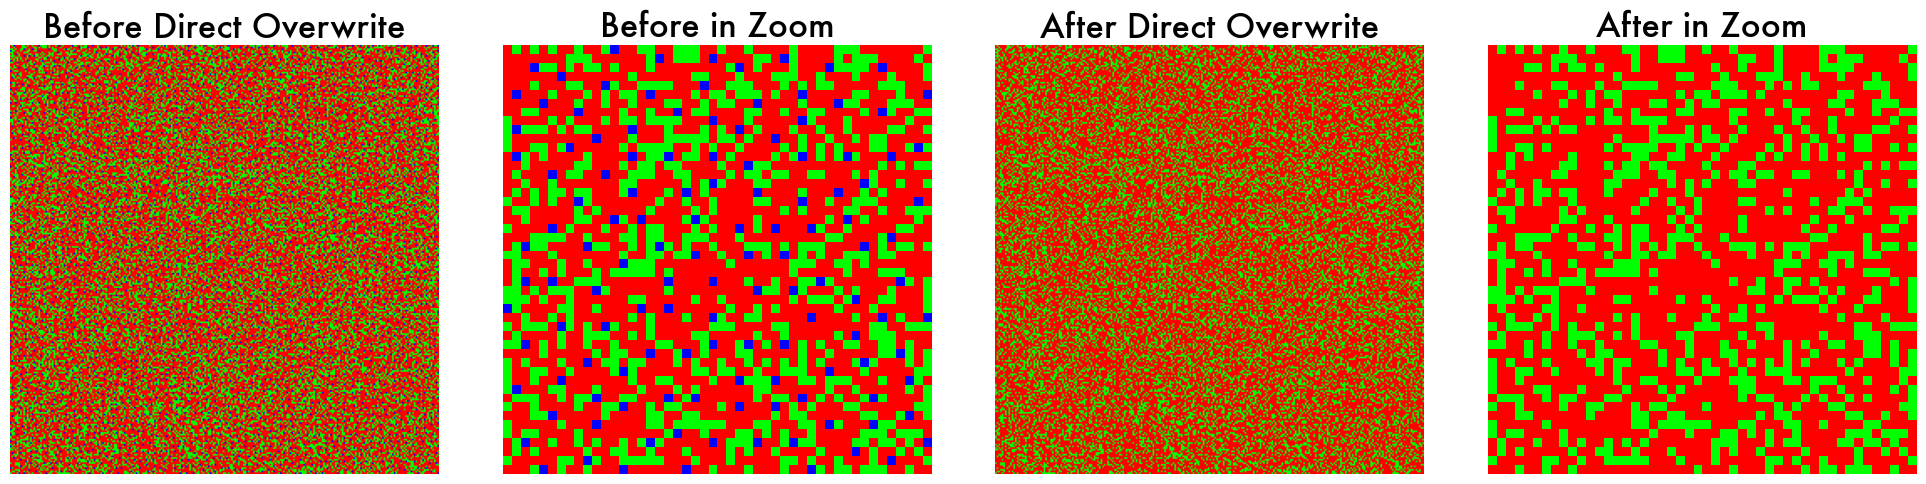

In [18]:
# Default RetinaModel
with open(f'{ROOT_DIR}/Tutorials/RetinaSimulation/Config/Default_Retina_Simulation.yaml', 'r') as f:
    default_params = yaml.safe_load(f)
default_retina = RetinaModel(default_params).to(DEVICE)

before_direct_overwrite_cone_mosaic = default_retina.SpectralSampling.get_cone_mosaic()
before_direct_overwrite_cone_mosaic = before_direct_overwrite_cone_mosaic[0].permute(1, 2, 0).cpu().detach().numpy()[:,:,:3]


'''Directly overwrite the default retina object'''

# Get the current cone mosaic of the shape (1, 4, 256, 256)
current_cone_mosaic = default_retina.SpectralSampling.get_cone_mosaic()
# Copy the current cone mosaic
new_cone_mosaic = current_cone_mosaic.clone()

where_S_cones_are = (current_cone_mosaic[0, 2] == 1)
# Deleting all S cone labels from the cone mosaic
new_cone_mosaic[:, 2, where_S_cones_are] = 0
# Adding L cone labels back to the deleted locations
new_cone_mosaic[:, 0, where_S_cones_are] = 1

# Overwrite the current cone mosaic with the new cone mosaic
default_retina.SpectralSampling.cone_mosaic = new_cone_mosaic.unsqueeze(0)

after_direct_overwrite_cone_mosaic = default_retina.SpectralSampling.get_cone_mosaic()
after_direct_overwrite_cone_mosaic = after_direct_overwrite_cone_mosaic[0].permute(1, 2, 0).cpu().detach().numpy()[:,:,:3]

# visualize the cone mosaic
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
axs[0].imshow(before_direct_overwrite_cone_mosaic)
axs[0].set_title('Before Direct Overwrite')
axs[0].set_axis_off()
axs[1].imshow(before_direct_overwrite_cone_mosaic[104:152, 104:152, :])
axs[1].set_title('Before in Zoom')
axs[1].set_axis_off()
axs[2].imshow(after_direct_overwrite_cone_mosaic)
axs[2].set_title('After Direct Overwrite')
axs[2].set_axis_off()
axs[3].imshow(after_direct_overwrite_cone_mosaic[104:152, 104:152, :])
axs[3].set_title('After in Zoom')
axs[3].set_axis_off()

plt.tight_layout()
plt.savefig(f'{ROOT_DIR}/Tutorials/RetinaSimulation/Results/direct_overwrite_cone_mosaic.png', bbox_inches='tight')
plt.close()

from IPython.display import display, Image
display(Image(filename=f'{ROOT_DIR}/Tutorials/RetinaSimulation/Results/direct_overwrite_cone_mosaic.png', width=1000))
